Experiment 4: Photoelectric Effect
Kaimi Kahihikolo & Jeff Kleyner
Exp. Conducted: 7 March 2017

# Preamble

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from pylab import rcParams

main_dir = "/Volumes/FLASH/School/S2017/PHYS274L/Lab4/"

In [15]:
## --- Linear Function
def linear(x,m,c):
    return (x*m)+c

# Constants

In [16]:
c = 299792458 ## Speed of light [m/s]
h = 6.62607004e-34 ##Planck's constant [m^2 kg s^-1]
e = 1.60217662e-19 ##Electron charge [C] = [A * s]

wavelen_red = 654.5e-9 ##Lambda red laser [m]
inverse_red = 1.0 / wavelen_red
wavelen_green = 532.5e-9 ##Lambda green laser [m]
inverse_green = 1.0 / wavelen_green
wavelen_violet = 398e-9 ##Lambda violet laser [m]
inverse_violet = 1.0 / wavelen_violet

# Red Laser

In [1]:
## --- Retrieve Data
red_data = np.genfromtxt(main_dir+"red.txt", delimiter=',')
red_I = np.array(red_data[:,0])
red_I_err = np.array(red_data[:,1])
red_V = np.array(red_data[:,2])
red_dV = np.array(red_data[:,3])

## -- Weighted Linear Regression
popt, pcov = curve_fit(linear, red_I[0:6], red_V[0:6], 
                       sigma=red_dV[0:6])

plt.plot(red_I[0:6], linear(red_I[0:6], *popt), 'r-', 
         label="Linear Regression")


plt.errorbar(red_I, red_V, color='k', fmt='.', yerr=red_dV, 
             xerr=red_I_err, label="Data")

plt.title("654.5 [nm] Laser: Voltage vs. Intensity")
plt.ylabel("Voltage [V]")
plt.xlabel("Current [A]")
plt.grid()
plt.legend()
plt.show()

## --- Intercept and Error
red_int = popt[1]
red_int_err = np.sqrt(pcov[1, 1])

print("Red Y-int = %s +/- %s") %(red_int, 
                                 red_int_err)

NameError: name 'np' is not defined

# Green Laser

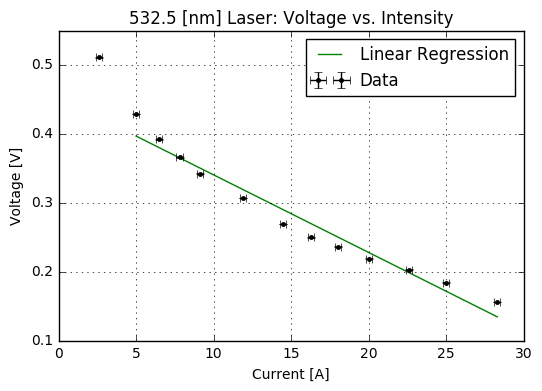

Green Y-int = 0.453005324219 +/- 0.0119829378081


In [18]:
green_data = np.genfromtxt(main_dir+"green.txt", 
                           delimiter=',')
green_I = green_data[:,0]
green_I_err = green_data[:,1]
green_V = green_data[:,2]
green_dV = green_data[:,3]

popt, pcov = curve_fit(linear, green_I[0:12], green_V[0:12], 
                       sigma=green_dV[0:12])

plt.plot(green_I[0:12], linear(green_I[0:12], *popt), 'g-', 
         label="Linear Regression")


plt.errorbar(green_I, green_V, color='k', fmt='.'
             ,yerr=green_dV, 
             xerr=green_I_err, label="Data")

plt.title("532.5 [nm] Laser: Voltage vs. Intensity")
plt.ylabel("Voltage [V]")
plt.xlabel("Current [A]")
plt.grid()
plt.legend()
plt.show()

green_int = popt[1]
green_int_err = np.sqrt(pcov[1, 1])

print("Green Y-int = %s +/- %s") %(green_int, 
                                   green_int_err)

# Violet Laser

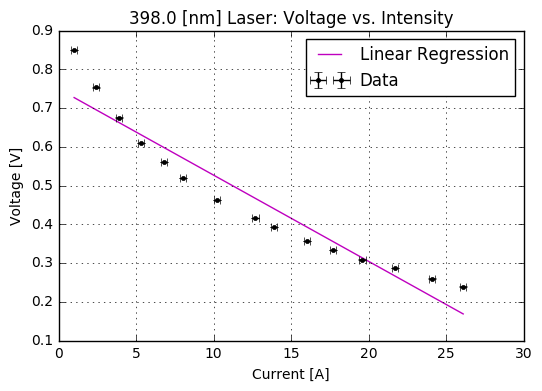

Violet Y-int = 0.749137781234 +/- 0.0274267418069


In [19]:
violet_data = np.genfromtxt(main_dir+"violet.txt", 
                            delimiter=',')
violet_I = violet_data[:,0]
violet_I_err = violet_data[:,1]
violet_V = violet_data[:,2]
violet_dV = violet_data[:,3]

popt, pcov = curve_fit(linear, violet_I[0:], 
                       violet_V[0:], 
                       sigma=violet_dV[0:])

plt.plot(violet_I[0:], linear(violet_I[0:], *popt), 'm-', 
         label="Linear Regression")


plt.errorbar(violet_I, violet_V, color='k', fmt='.',
             yerr=violet_dV, 
             xerr=violet_I_err, label="Data")

plt.title("398.0 [nm] Laser: Voltage vs. Intensity")
plt.ylabel("Voltage [V]")
plt.xlabel("Current [A]")
plt.grid()
plt.legend()
plt.show()

violet_int = popt[1]
violet_int_err = np.sqrt(pcov[1, 1])

print("Violet Y-int = %s +/- %s") %(violet_int, 
                                    violet_int_err)

# Stopping Potential

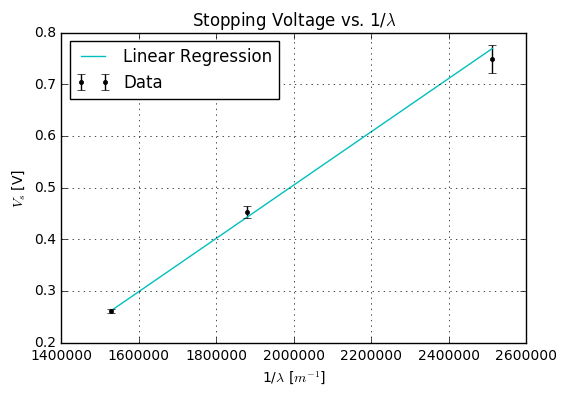

Slope = 5.15881121508e-07 +/- 2.67456665184e-08 [V m]
Y-int = -0.526706817764 +/- 0.0422619094442 [V]


In [20]:
Vs = red_int, green_int, violet_int
Vs_err = red_int_err, green_int_err, violet_int_err
L_inv = inverse_red, inverse_green, inverse_violet

## --- Weighted Linear Regression
popt, pcov = curve_fit(linear, L_inv, Vs, sigma=Vs_err)

plt.plot(L_inv, linear(np.array(L_inv), *popt), 'c-', 
         label="Linear Regression")


plt.errorbar(L_inv, Vs, yerr=Vs_err, fmt='.', color='k', 
             label="Data")
plt.title("Stopping Voltage vs. 1/$\lambda$")
plt.ylabel("$V_s$ [V]")
plt.xlabel("1/$\lambda$ [$m^{-1}$]")
plt.grid()
plt.legend(loc=2)
plt.show()

## --- Slope and Error
potential_slope = popt[0]
potential_slope_err = np.sqrt(pcov[0,0])

potential_int = popt[1]
potential_int_err = np.sqrt(pcov[1,1])

print("Slope = %s +/- %s [V m]") %(potential_slope, 
                                   potential_slope_err)

print("Y-int = %s +/- %s [V]") %(potential_int, 
                                   potential_int_err)

# Calculations

In [21]:
## --- Calculate Experimental h, slope*e /c and error
planck_exp = potential_slope*e/c
planck_exp_err = potential_slope_err*e/c

print("Experimental Planck's Constant = %s" 
      +"+/- %s [$m^{2} kg s^{-1}$]") %(planck_exp, planck_exp_err)
print("Actual Planck's Constant = %s [$m^{2} kg s^{-1}$]") %(h)

## --- Compute Z-score
sigma = (h - planck_exp)/planck_exp_err
print("Z-score = %s") %sigma

phi_exp = potential_int
phi_exp_err = potential_int_err

print("Experimental Work Function  = %s" 
      +"+/- %s [$eV$]") %(phi_exp, phi_exp_err)

Experimental Planck's Constant = 2.75701622747e-34+/- 1.4293648969e-35 [$m^{2} kg s^{-1}$]
Actual Planck's Constant = 6.62607004e-34 [$m^{2} kg s^{-1}$]
Z-score = 27.0683421772
Experimental Work Function  = -0.526706817764+/- 0.0422619094442 [$eV$]
